# Quantum Circuit Implementation and Comparison

## Introduction

In this project, we implement a simple quantum circuit in Python and compare its results with those obtained using Qiskit. The goal is to apply a sequence of quantum gates to a quantum state and perform probabilistic measurements to obtain measurement outcomes.

## Quantum Gates and Matrices

We start by defining several fundamental quantum gate matrices:

- `x_matrix`: The Pauli-X gate matrix.
- `y_matrix`: The Pauli-Y gate matrix.
- `z_matrix`: The Pauli-Z gate matrix.
- `h_matrix`: The Hadamard gate matrix.
- `cnot_matrix`: The Controlled-X (CNOT) gate matrix.
- `swap_matrix`: The Swap gate matrix.
- `U_matrix`: A custom unitary gate matrix (Note: it should be U_matrix, not unitary_matrix).

## Applying Gates to a Quantum State

We define a function `gate` that applies a given gate matrix to a quantum state, either to a specific qubit or to the entire state, depending on the input. The function ensures that the original state is not modified by making a copy of it.

We also define a function `apply_gate` that takes a sequence of gate symbols and qubits and applies the corresponding gates to the quantum state. The function handles various gate symbols, including X, Y, Z, H, CX (CNOT), S (Swap), and U (Custom Unitary).

## Simulating Measurements

To simulate quantum measurements probabilistically, we define a function `measurement` that calculates the probabilities of measurement outcomes (00, 01, 10, and 11) based on the current quantum state. It then randomly selects one of these outcomes and returns it.

## Running the Quantum Circuit

We prompt the user to input the number of iterations and the sequence of gates and qubits to apply. We initialize the quantum state to |0⟩ (represented as `[1, 0]`), apply the gate sequence, and perform measurements for the specified number of iterations.

Measurement outcomes are counted and stored in variables `count_00`, `count_01`, `count_10`, and `count_11`. The results are displayed as a bar graph using `matplotlib`.

## Comparison with Qiskit

We also implement a similar quantum circuit using Qiskit for comparison purposes. The Qiskit circuit consists of X, CNOT, and H gates, followed by measurements. We run the circuit on the statevector simulator and visualize the measurement outcomes using Qiskit's `plot_histogram` function.

Overall, this project demonstrates the implementation of a simple quantum circuit in Python, simulating quantum measurements, and comparing the results with a well-established quantum computing library, Qiskit.


In [82]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the Pauli matrices and other gate matrices
x_matrix = np.array([[0.0, 1.0], [1.0, 0.0]], dtype=complex)
y_matrix = np.array([[0.0, -1.0j], [1.0j, 0.0]], dtype=complex)
z_matrix = np.array([[1.0, 0.0], [0.0, -1.0]], dtype=complex)
h_matrix = (1/np.sqrt(2)) * np.array([[1.0, 1.0], [1.0, -1.0]], dtype=complex)
cnot_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0]], dtype=complex)
swap_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]], dtype=complex)
U_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, -1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, -1.0]], dtype=complex)

In [ ]:
# Define a function to apply a gate to the quantum state
def gate(state, matrix, qubit, label="U"):
    update_state = state.copy()  # Make a copy to avoid modifying the original state
    
    if type(qubit) is np.ndarray:
        update_state = matrix @ state.flatten()  # Apply the gate matrix to the flattened state
        update_state = update_state.reshape(state.shape)  # Reshape the state to its original shape
    else:
        update_state[qubit] = matrix @ state[qubit]  # Apply the gate matrix to a specific qubit
    
    return update_state

In [ ]:
# Define a function to apply a sequence of gates to the quantum state
def apply_gate(input_sequence, state):
    gate_symbols = set('XYZHCS')  # Define symbols for gate names
    gate_qubit_pairs = input_sequence.split()  # Split input by space
    
    for gate_qubit_pair in gate_qubit_pairs:
        input_gate = ''
        input_qubits = ''
        
        for char in gate_qubit_pair:
            if char in gate_symbols:
                input_gate += char
            elif char.isdigit():
                input_qubits += char
        
        qubit = 0
        matrix = x_matrix
        
        if input_gate in ('X', 'Y', 'Z', 'H'):
            matrix = globals()[f'{input_gate.lower()}_matrix']  # Access the corresponding matrix
            qubit = int(input_qubits)
        elif input_gate == 'CX':
            matrix = cnot_matrix
            qubit = np.array([int(input_qubits[0]), int(input_qubits[1])])
        elif input_gate == 'S':
            matrix = swap_matrix
            qubit = np.array([int(input_qubits[0]), int(input_qubits[1])])
        elif input_gate == 'U':
            matrix = unitary_matrix  # Note: This should be U_matrix, not unitary_matrix
            qubit = np.array([int(input_qubits[0]), int(input_qubits[1])])

        # Apply the gate with the specified qubits
        state = gate(state, matrix=matrix, qubit=qubit, label=input_gate)

    return state

In [79]:
# Simulate measurements probabilistically
def measurement(state):
    
    # Calculate the probabilities of measurement outcomes
    prob_00 = np.abs(state[0, 0])**2 / 2
    prob_01 = np.abs(state[0, 1])**2 / 2
    prob_10 = np.abs(state[1, 0])**2 / 2
    prob_11 = np.abs(state[1, 1])**2 / 2
    
    measurement_outcome = np.random.choice(["00", "01", "10", "11"], p=[prob_00, prob_01, prob_10, prob_11])
    return measurement_outcome    

X0 CX01 H1
Measurement Counts:
[2436, 2462, 2594, 2508]
Final State:
[[1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j]]


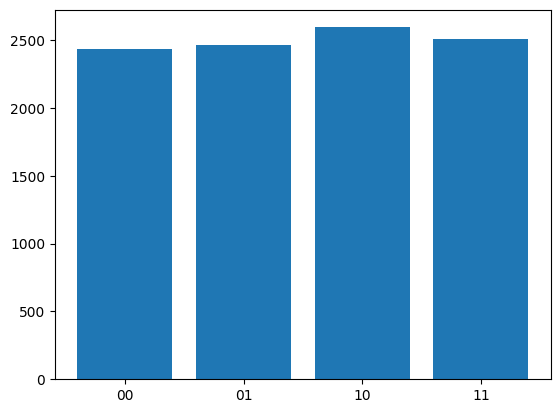

In [86]:
# Apply the gates for the specified number of iterations
num_iterations = int(input('Enter the number of iterations: '))
input_sequence = input(f'Enter the sequence of gates and qubits: ')

print(input_sequence)

# Initialize the quantum state to [1, 0] (state |0>)
state = np.array([[1.0, 0.0], [1.0, 0.0]], dtype=complex)

# Initialize counts for different measurement outcomes
count_00, count_01, count_10, count_11 = 0, 0, 0, 0

for iteration in range(num_iterations):
    state = apply_gate(input_sequence, state)  # Apply the specified gate sequence to the state
    measurement_outcome = measurement(state)
    
    # Update the counts based on the measurement outcome
    if measurement_outcome == "00":
        count_00 += 1
    elif measurement_outcome == "01":
        count_01 += 1
    elif measurement_outcome == "10":
        count_10 += 1
    elif measurement_outcome == "11":
        count_11 += 1

counts = [count_00, count_01, count_10, count_11]
outcomes = ['00','01','10','11']    
print("Measurement Counts:")
print(counts)
plt.bar(outcomes, counts)
print("Final State:")
print(state)

# Testing using Qiskit

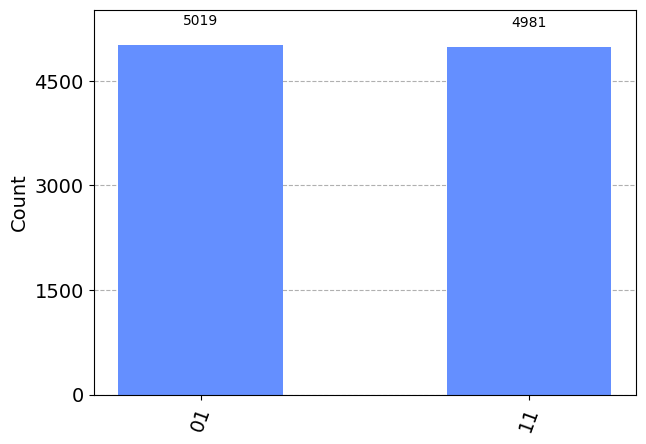

In [83]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

qc.x(0)
qc.cx(0,1)
qc.h(1)

# Measure the qubits
qc.measure_all()

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, simulator, shots=10000)
result = job.result()
counts = result.get_counts()

# Create a histogram of measurement outcomes
plot_histogram(counts)
